<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #ebe6eb; font-size:110%; text-align:left">

<h2 align="left"><font color='purple'>Assignment:</font></h2>

The assignment is about building a classification model for tennis serve to be ace/not

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:120%; text-align:left">
<a id="contents_tabel"></a>
<h2 align="left"><font color='purple'>Table of Contents:</font></h2>

* Step 1 | Import Libraries
* Step 2 | Load Data
* Step 3 | Data Exploration
    - Step 3.1 | Basic Exploration
    - Step 3.2 | Visualisation of Data
      - Disribution of Categorical data
      - Disribution of Numerical data
* Step 4 | Visualize player and ball coordinates on the tennis court
* Step 5 | Flip the coordinates
* Step 6 | Bivariate analysis between features and target variable
    - Step 6.1 Categorical analysis
    - Step 6.1 Numerical analysis
* Step 7 | Handling Null values
* Step 8 | Drop unwanted columns
* Step 9 | Categorical Feautre Encoding
* Step 10 | Correlation Analysis
* Step 11 | Train-Test Split
* Step 12 | XG Boost Model Building and parameter tuning
* Step 13 | XG Boost Model Run and Evaluation
* Step 14 | Predict sample data points


# Step 1 | Import Libraries

In [1]:
# # When this exception is raised, AttributeError: 'super' object has no attribute '__sklearn_tags__'
# # https://github.com/scikit-learn/scikit-learn/issues/30542
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, to_rgba, ListedColormap
from matplotlib import colors
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from xgboost import XGBClassifier, callback

np.random.seed(42)

# Step 2 | Load Data

In [3]:
df = pd.read_csv("./data/task_set.csv")

#Step 3 | Data Exploration

## Step 3.1 | Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187926 entries, 0 to 187925
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   surface            187926 non-null  object 
 1   serve_side         187926 non-null  object 
 2   serve_number       187926 non-null  int64  
 3   ball_hit_y         187817 non-null  float64
 4   ball_hit_x         187817 non-null  float64
 5   ball_hit_z         187817 non-null  float64
 6   ball_hit_v         187807 non-null  float64
 7   ball_net_v         187797 non-null  float64
 8   ball_net_z         187809 non-null  float64
 9   ball_net_y         187810 non-null  float64
 10  ball_bounce_x      187817 non-null  float64
 11  ball_bounce_y      187817 non-null  float64
 12  ball_bounce_v      187809 non-null  float64
 13  ball_bounce_angle  187816 non-null  float64
 14  hitter_x           187810 non-null  float64
 15  hitter_y           187810 non-null  float64
 16  re

<font color='blue'>Notes:</font>

<font color='darkblue'>

*   The dataset contains 19 independent features and a dependent variable
*   consists of both object and float64 type
</font>

In [5]:
df.head()

,surface,serve_side,serve_number,ball_hit_y,ball_hit_x,ball_hit_z,ball_hit_v,ball_net_v,ball_net_z,ball_net_y,...,ball_bounce_y,ball_bounce_v,ball_bounce_angle,hitter_x,hitter_y,receiver_x,receiver_y,hitter_hand,receiver_hand,is_ace
0,hard,deuce,2,1.459,11.445,2.830,91.5,67.9,1.241,-0.980,...,-2.278,60.7,19.216,11.739,1.398,-13.343,-3.570,right,left,0
1,hard,ad,1,1.083,-11.228,2.817,125.5,97.7,1.019,-0.026,...,-0.618,88.8,12.428,-11.744,1.131,15.459,-4.067,left,right,0
2,hard,deuce,1,0.835,11.149,2.793,109.7,85.5,1.156,-2.082,...,-3.744,75.3,12.737,11.538,0.647,-13.679,-3.544,right,right,0
3,clay,ad,2,-1.424,11.488,2.727,97.1,74.1,1.095,1.170,...,1.853,68.1,17.743,11.690,-1.169,-11.378,3.402,right,right,0
4,hard,ad,1,0.472,-10.985,2.660,121.0,95.7,1.094,-0.301,...,-0.525,85.5,12.013,-11.508,0.559,14.323,-3.629,right,right,0


In [6]:
df.isnull().sum()

surface                0
serve_side             0
serve_number           0
ball_hit_y           109
ball_hit_x           109
ball_hit_z           109
ball_hit_v           119
ball_net_v           129
ball_net_z           117
ball_net_y           116
ball_bounce_x        109
ball_bounce_y        109
ball_bounce_v        117
ball_bounce_angle    110
hitter_x             116
hitter_y             116
receiver_x           209
receiver_y           209
hitter_hand            0
receiver_hand          0
is_ace                 0
dtype: int64

<font color='blue'>Notes:</font>

<font color='darkblue'>

*   The dataset contains 'na' values and the number is shown in above table
</font>

In [7]:
df.describe(include='number')

,serve_number,ball_hit_y,ball_hit_x,ball_hit_z,ball_hit_v,ball_net_v,ball_net_z,ball_net_y,ball_bounce_x,ball_bounce_y,ball_bounce_v,ball_bounce_angle,hitter_x,hitter_y,receiver_x,receiver_y,is_ace
count,187926.000000,187817.000000,187817.000000,187817.000000,187807.000000,187797.000000,187809.000000,187810.000000,187817.000000,187817.000000,187809.000000,187816.000000,187810.000000,187810.000000,187717.000000,187717.00000,187926.000000
mean,1.356635,-0.003056,0.025959,2.842908,108.650497,85.511926,1.177421,-0.002502,-0.015045,-0.002121,75.887740,14.625971,0.073049,-0.034099,-0.044800,-0.01033,0.080585
std,0.479007,1.148724,11.362744,0.147901,15.495405,13.023081,0.162155,1.392535,5.146167,2.415050,12.496144,3.643096,11.671999,1.167514,14.066468,3.67635,0.272197
min,1.000000,-7.593000,-19.079000,-0.006000,2.800000,0.000000,-21.292000,-9.194000,-27.580000,-9.170000,0.000000,0.000000,-19.997000,-7.819000,-19.961000,-8.01000,0.000000
25%,1.000000,-1.028000,-11.371000,2.772000,96.700000,75.200000,1.084000,-1.103000,-5.086000,-2.062000,66.600000,12.191000,-11.669000,-1.088000,-14.077000,-3.67300,0.000000
50%,1.000000,-0.035000,9.600000,2.844000,109.700000,86.400000,1.163000,-0.002000,-3.180000,0.000000,76.400000,14.052000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,1.024000,11.371000,2.918000,121.100000,96.000000,1.250000,1.112000,5.082000,2.078000,85.700000,16.969000,11.727000,1.028000,14.053000,3.65100,0.000000
max,2.000000,6.511000,17.802000,4.213000,195.300000,163.000000,11.637000,8.563000,23.332000,8.319000,164.600000,90.000000,19.709000,8.007000,19.989000,8.25900,1.000000


In [8]:
df.describe(include="object")

,surface,serve_side,hitter_hand,receiver_hand
count,187926,187926,187926,187926
unique,3,2,2,2
top,hard,deuce,right,right
freq,132826,98186,163951,164117


## Step 3.2 | Visualisation of Data

### Disribution of Categorical data

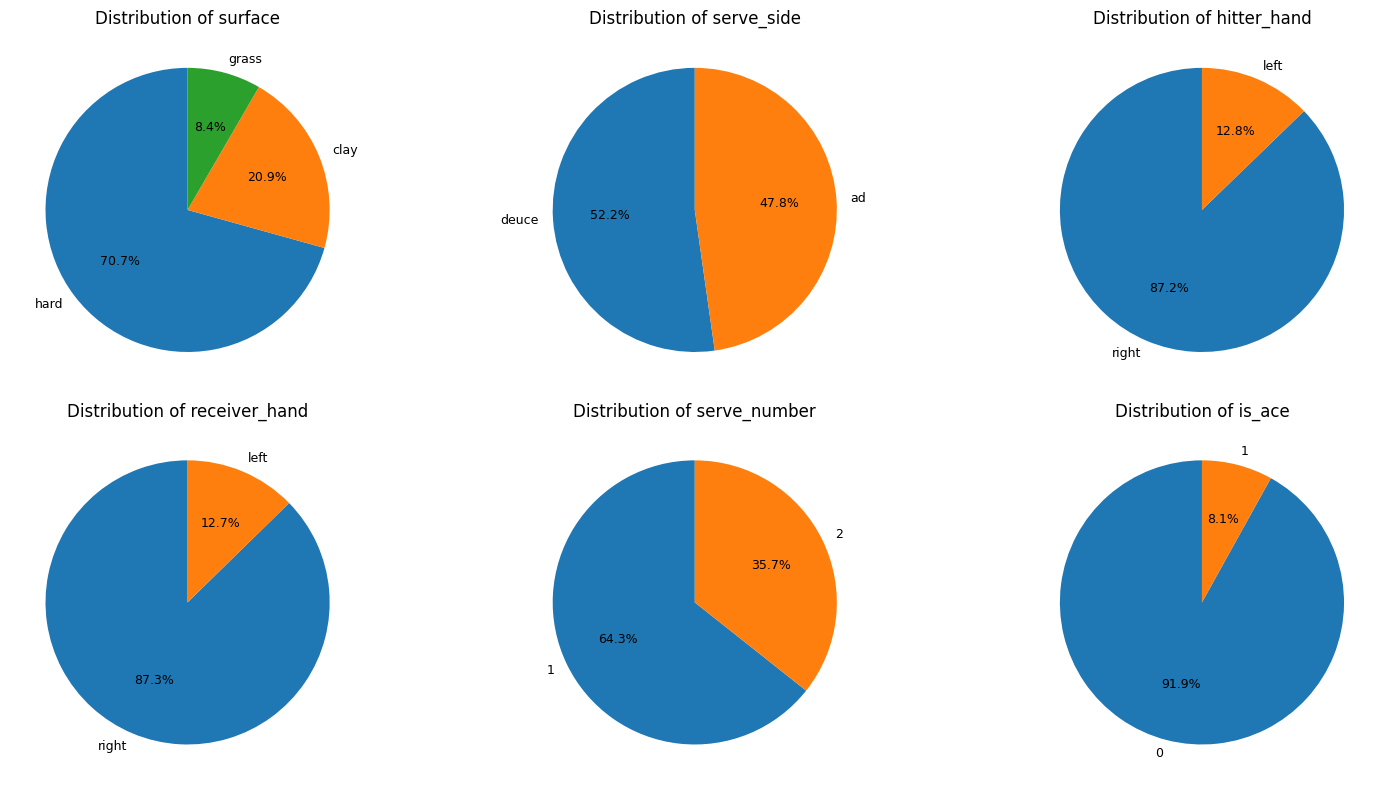

In [9]:
num_plots_per_row = 3

categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns += ['serve_number', 'is_ace']
num_categorical_cols = len(categorical_columns)

fig, axes = plt.subplots(
    nrows=(num_categorical_cols // num_plots_per_row) + (num_categorical_cols % num_plots_per_row > 0),
    ncols=num_plots_per_row,
    figsize=(16, 8)
)

axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    # Plot pie chart
    wedges, texts, autotexts = axes[idx].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 9}
    )
    axes[idx].set_title(f'Distribution of {column}', fontsize=12)

# Hide unused subplots
for idx in range(len(categorical_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

<font color='blue'>Notes:</font>

<font color='darkblue'>

*   The distribution of categorical like features are plotted in the above picture
*   The target variable, 'is_ace' represents an imbalanced dataset
</font>

### Distribution of Numerical data

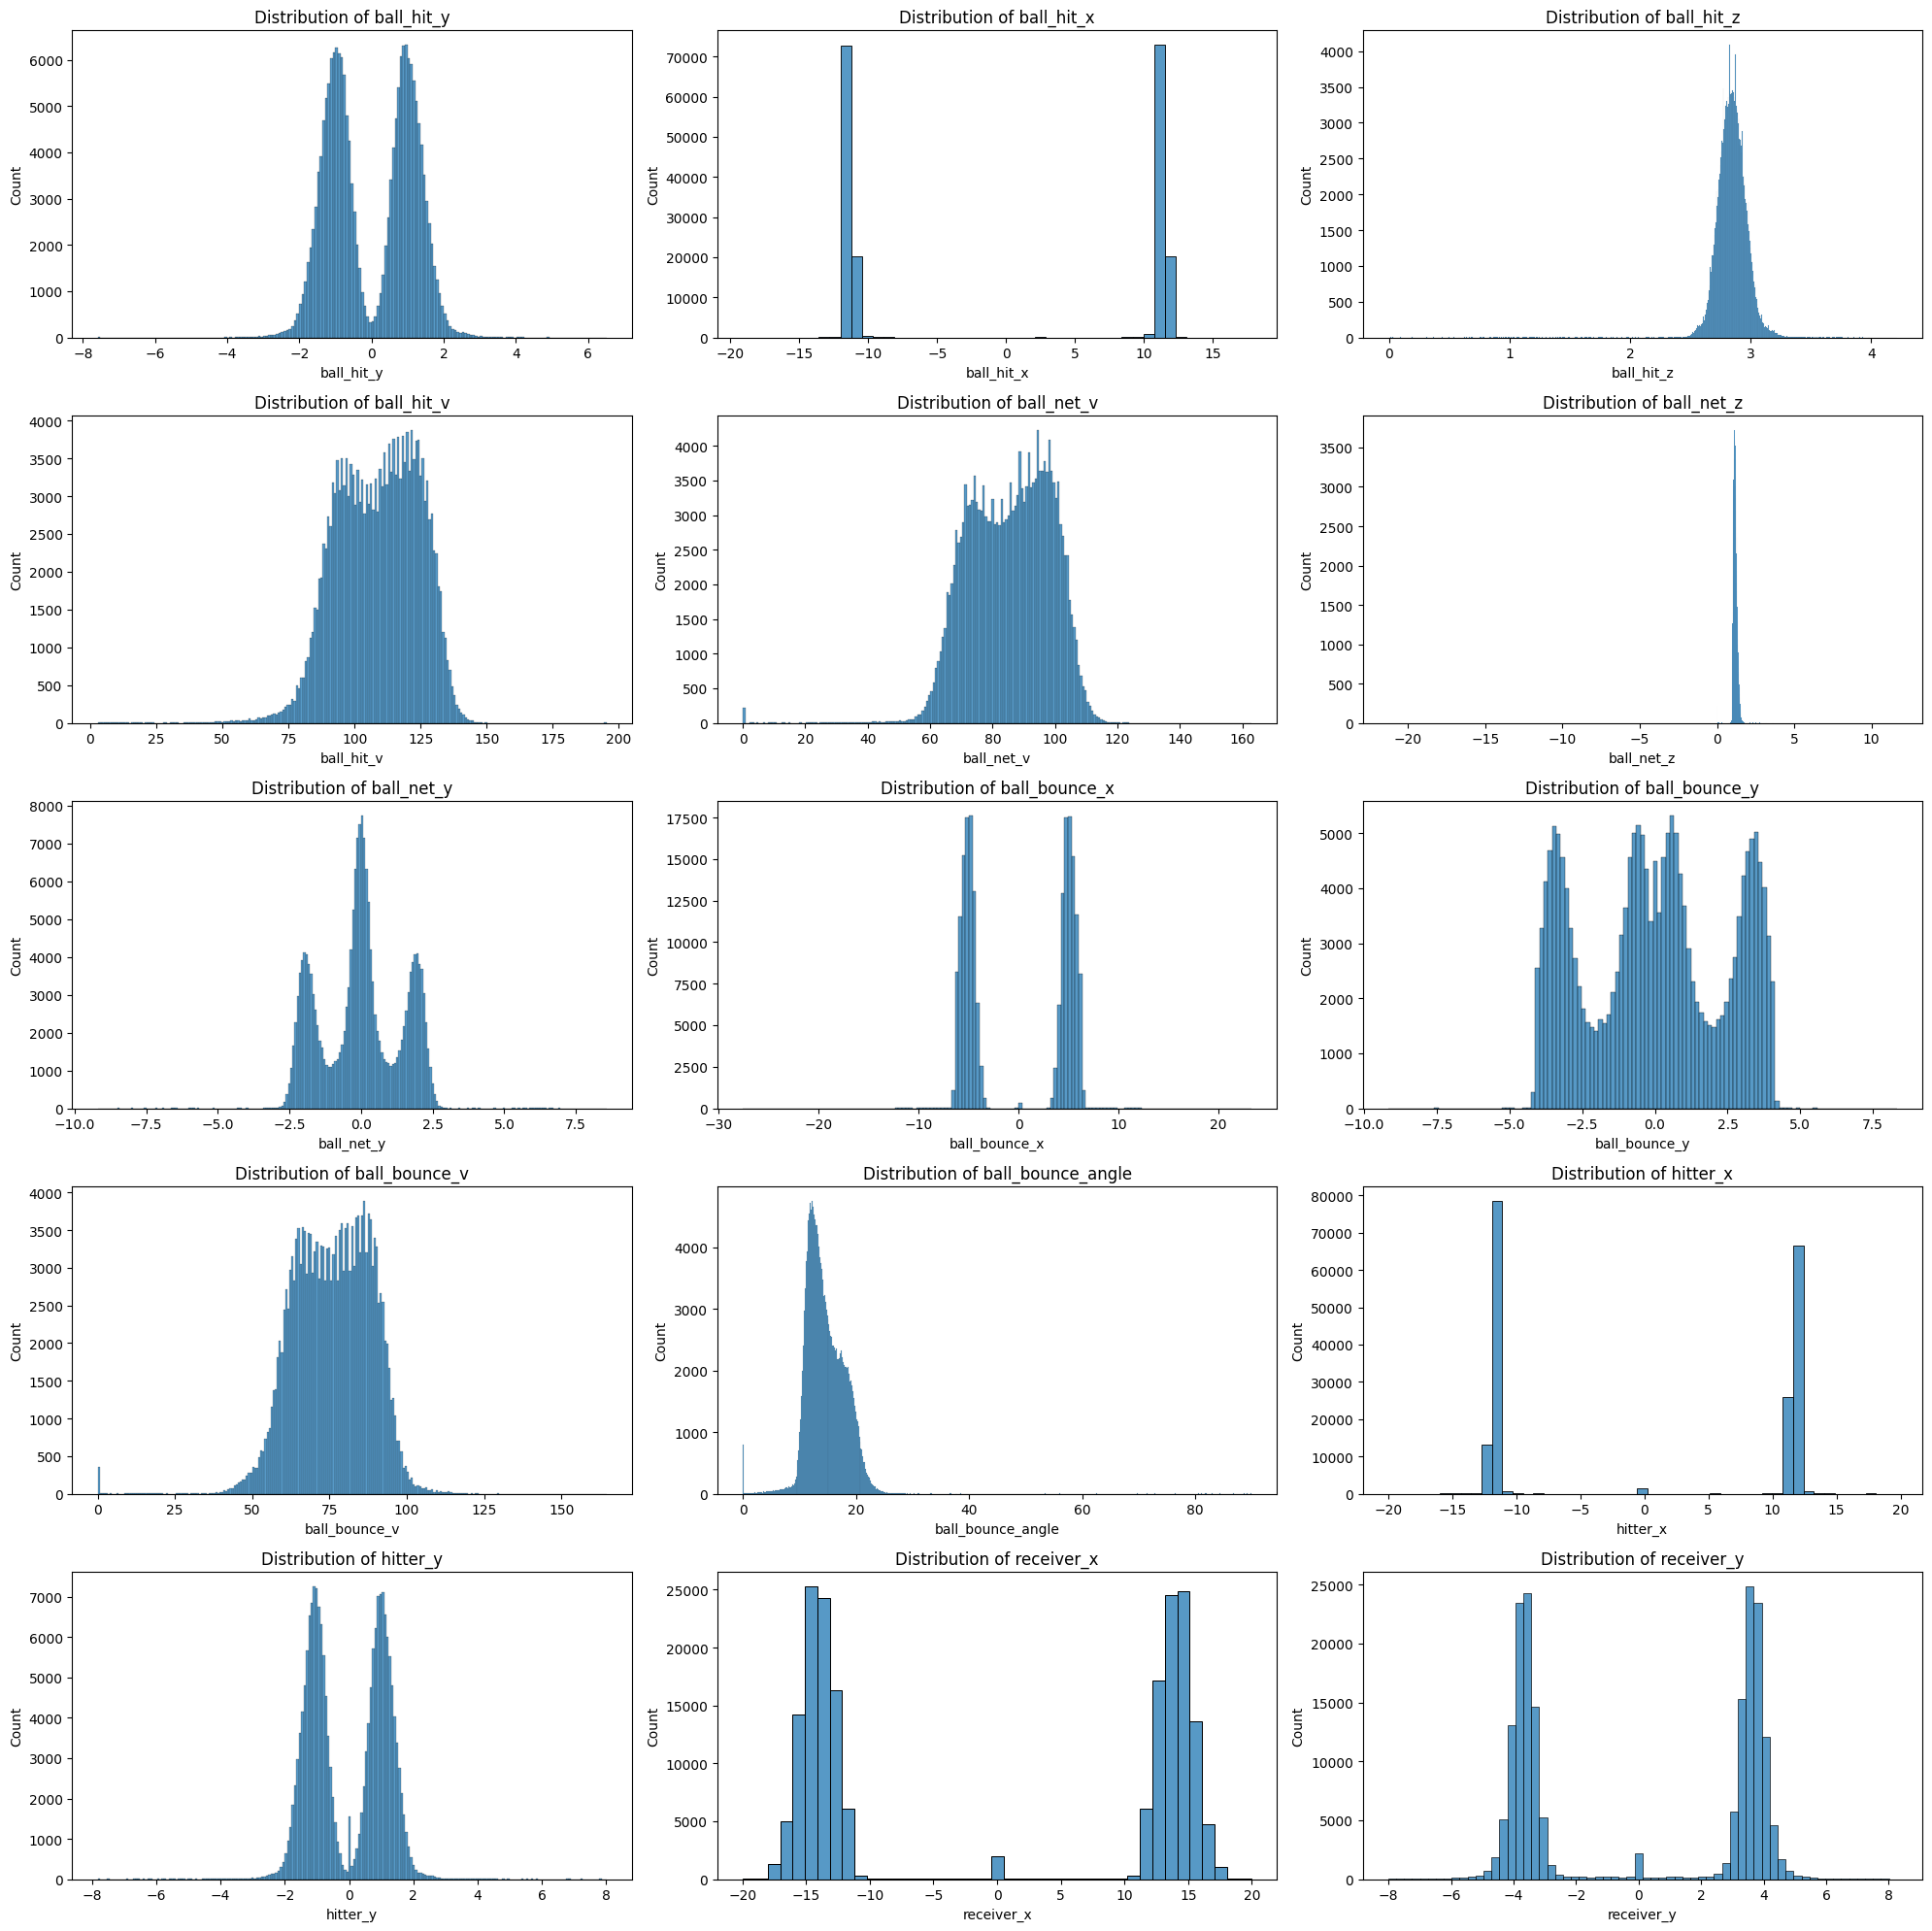

In [10]:
num_plots_per_row = 3

numeric_columns = df.select_dtypes(include=['number']).columns.to_list()
numeric_columns.remove('serve_number')
numeric_columns.remove('is_ace')

num_numeric_cols = len(numeric_columns)
fig, axes = plt.subplots(
    nrows=(num_numeric_cols // num_plots_per_row) + (num_numeric_cols % num_plots_per_row > 0),
    ncols=num_plots_per_row,
    figsize=(20, 20)
)

axes = axes.flatten()  # Flatten for easier indexing
for idx, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=False, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')

# Hide empty subplots
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


<font color='blue'>Notes:</font>

<font color='darkblue'>

*   The distribution of numerical features are plotted above
*   The two tower distribution in coordinate features represent two different sides(left/negative and right/positive) of x-coordinate of the tennis court and the deuce and ad side of the serve(y-coordinate)
</font>

# Step 4 | Visualize player and ball coordinates on the tennis court

In [11]:
#Creating a new feature called quandrant based on the assumption of hitter_x and server_side
#quadrant can have four values [right_deuce, right_ad, left_deuce, left_ad] and describes the serving quadrant
#This feature makes analysis easy and can be deleted before we make data into model
df['quadrant'] = df.apply(
    lambda row: (
        'right_deuce' if (row['hitter_x'] > 0 and row['serve_side'] == 'deuce') else
        'right_ad' if (row['hitter_x'] > 0 and row['serve_side'] == 'ad') else
        'left_deuce' if (row['hitter_x'] < 0 and row['serve_side'] == 'deuce') else
        'left_ad' if (row['hitter_x'] < 0 and row['serve_side'] == 'ad') else
        None
    ),
    axis=1
)

In [12]:
# Function to draw a horizontal tennis court
def draw_tennis_court():
    # Court dimensions
    court_length = 23.77  # meters (horizontal direction)
    court_width = 10.97  # meters (vertical direction)
    service_box_length = 6.40  # meters
    service_box_width = court_width  # meters

    # Court boundaries
    plt.plot([-court_length / 2, court_length / 2], [-court_width / 2, -court_width / 2], 'k')  # Bottom sideline
    plt.plot([-court_length / 2, court_length / 2], [court_width / 2, court_width / 2], 'k')  # Top sideline
    plt.plot([-court_length / 2, -court_length / 2], [-court_width / 2, court_width / 2], 'k')  # Left baseline
    plt.plot([court_length / 2, court_length / 2], [-court_width / 2, court_width / 2], 'k')  # Right baseline

    # Service boxes
    plt.plot([-service_box_length, service_box_length], [service_box_width / 2, service_box_width / 2], 'k')  # Top service box line
    plt.plot([-service_box_length, service_box_length], [-service_box_width / 2, -service_box_width / 2], 'k')  # Bottom service box line
    plt.plot([-service_box_length, -service_box_length], [-service_box_width / 2, service_box_width / 2], 'k')  # Left service box line
    plt.plot([service_box_length, service_box_length], [-service_box_width / 2, service_box_width / 2], 'k')  # Right service box line

    # Net
    plt.plot([0, 0], [-court_width / 2, court_width / 2], 'k--')  # Net line
    plt.plot([-service_box_length, service_box_length], [0, 0], 'k')  # Serve line

    plt.title("Tennis Court", fontsize=16)
    plt.xlim(-court_length / 2 - 3, court_length / 2 + 3)
    plt.ylim(-court_width / 2 - 3, court_width / 2 + 3)
    plt.gca().set_aspect('equal', adjustable='box')


# Plot all serve quadrants with two plots per row
def plot_court_and_data(df, features_to_plot, plot_by_side):
  plot_by_side_values = df[plot_by_side].value_counts().index
  num_of_plots = len(plot_by_side_values)
  rows = (num_of_plots + 1) // 2  # Two plots per row

  fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
  axes = axes.flatten()

  for i, value in enumerate(plot_by_side_values):
    ax = axes[i]
    plt.sca(ax)  # Set current axis
    df_subset = df[df[plot_by_side] == value]
    display_name = f"Serving from {value}"
    # plot_court_and_data(df_subset, features_to_plot, f"Serving from {value}")

    # Set up the plot
    draw_tennis_court()

    # Define a mapping for visual parameters to their respective base colors
    scatter_properties = {
        "hitter": {"x": "hitter_x", "y": "hitter_y", "base_color": "blue", "label": "hitter"},
        "receiver": {"x": "receiver_x", "y": "receiver_y", "base_color": "red", "label": "receiver"},
        "ball_hit": {"x": "ball_hit_x", "y": "ball_hit_y", "base_color": "lightblue", "label": "ball_hit"},
        "ball_bounce": {"x": "ball_bounce_x", "y": "ball_bounce_y", "base_color": "green", "label": "ball_bounce"},
    }

    # Plot the data based on visual parameters
    for param, props in scatter_properties.items():
        if param in features_to_plot:
            # colors = [
            #     to_rgba(props["base_color"], alpha=1.0 if is_ace else 0.3)  # Darker or lighter shade
            #     for is_ace in df_subset['is_ace']
            # ]
            plt.scatter(
                df_subset[props["x"]],
                df_subset[props["y"]],
                # c=colors,
                c=props["base_color"],
                label=props["label"],
                s=10,
            )

    # Add legend, title, and grid
    plt.legend(loc="upper right", fontsize=10)
    plt.title(display_name)
    plt.grid(True)

  # Remove unused subplots
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

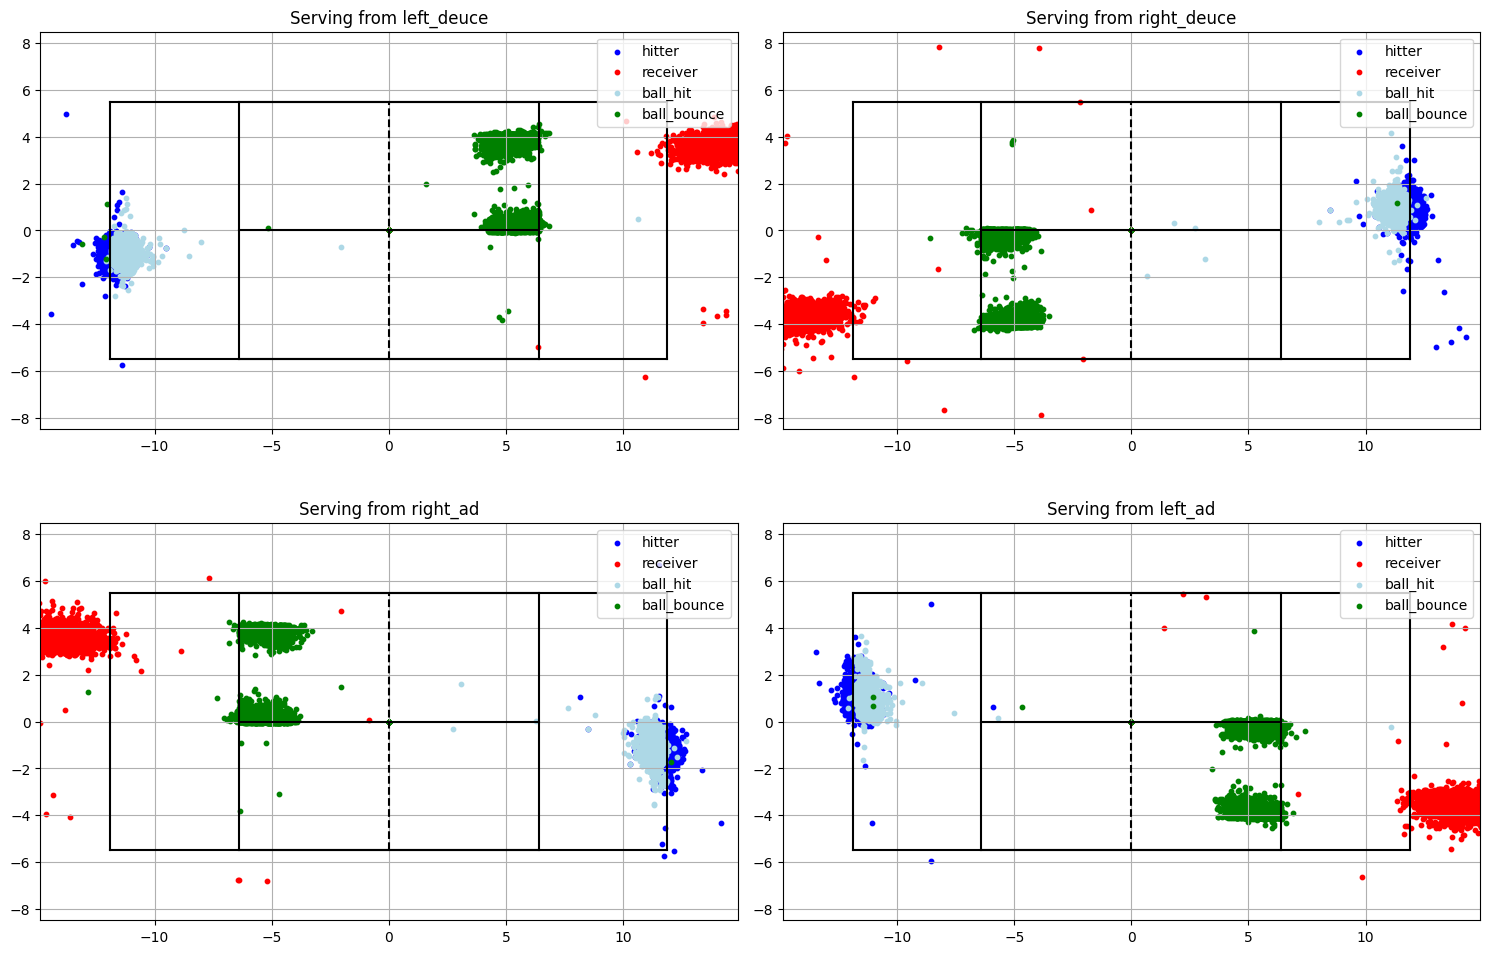

In [13]:
#Visulize features by quadrant. It shows only ace datapoints. please uncomment the below line to see the whole dataset
features_to_plot = ["hitter", "ball_hit", "receiver", "ball_bounce"]
plot_by_side = 'quadrant' # serve_side, quadrant
plot_court_and_data(df[df['is_ace'] == 1], features_to_plot,  plot_by_side)
# plot_court_and_data(df, features_to_plot,  plot_by_side)

<font color='blue'>Notes:</font>

<font color='darkblue'>

*   The player and ball coordinate features are plotted(scattered) on a tennis court mapped to a two dimensional coordinate system
*   The above picture is plotted with the aces on all the four quadrants(**right/left - deuce/ad**) combination
*   It is clearly observable that the data quality is not upto the mark as it can be noticed. Let's zoom into one of the plot(**right_ad**) for example
  -   The **hitter cordinates(dark blue)** are expected to be out side of the base line where as the data points are clearly visible even way inside the base line
  -   The **ball hit coordinates(light blue)** are expected to be out side/slightly inside of the base line where as the data points are clearly visible even way inside the base line
  -   The **ball bounce coordinates(green)** are expected to be inside of the left ad serve box where as the data points are clearly visible even way outside the expectation
  -   The **receiver coordinates(red)** is plotted and it can be see that the datapoints are quite scattered
* The data is only plotted for ace serves(is_ace=1) and you can see the data quality issues are more visible when the whole data is plotted.
</font>

# Step 5 | Flip the coordinates



Current data represent serving from both the sides(right and left or can also be reffered as positive and negative X coordinate) with deuce/ad. That makes four quadrants. It may be wisable to change the coordinates of features that are the left x-axis to the right axis.

In [14]:
# Columns to flip
columns_to_flip = ['hitter_x', 'hitter_y', 'ball_bounce_x', 'ball_bounce_y',
                   'ball_hit_x', 'ball_hit_y', 'receiver_x', 'receiver_y', 'ball_net_y']

# Flip coordinates for rows in the 'left_deuce' quadrant
df.loc[(df['quadrant'] == 'left_deuce') | (df['quadrant'] == 'left_ad'), columns_to_flip] *= -1

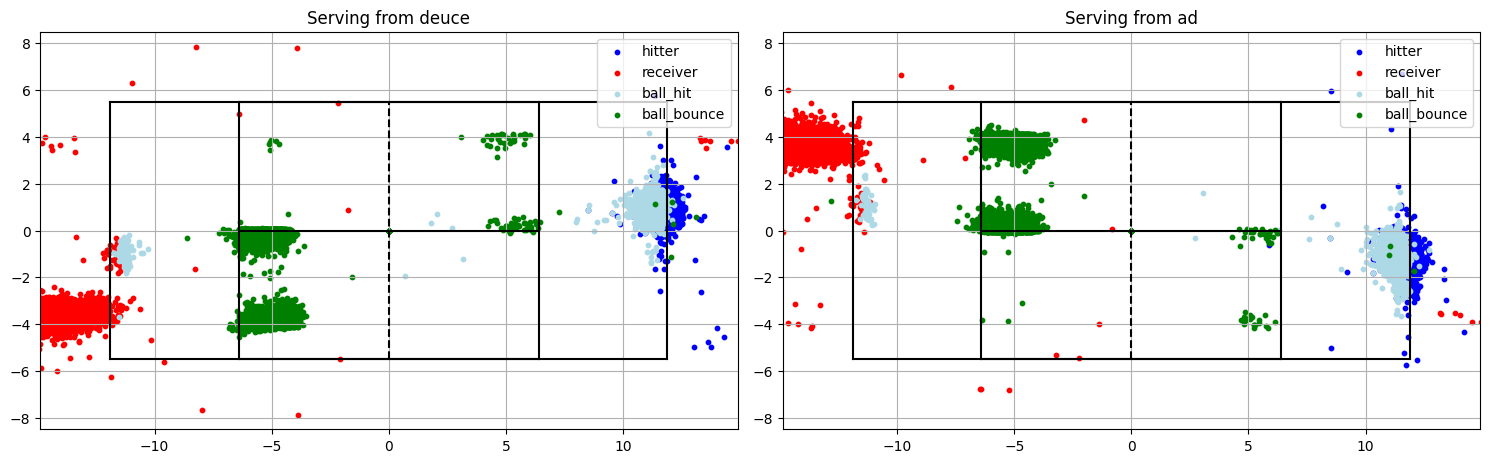

In [15]:
#Let us visulize how the ball and player features looks on the tennis court
#Visulize features by serve_side. It shows only ace datapoints. please uncomment the below line to see the whole dataset
features_to_plot = ["hitter", "ball_hit", "receiver", "ball_bounce"]
plot_by_side = 'serve_side' # serve_side, quadrant
plot_court_and_data(df[df['is_ace'] == 1], features_to_plot,  plot_by_side)
# plot_court_and_data(df, features_to_plot,  plot_by_side)

<font color='blue'>Notes:</font>

<font color='darkblue'>

*   The player and ball coordinate features are plotted(scattered) on a tennis court mapped to a two dimensional coordinate system
*   All the serve datapoints that represented left side(negative x-coordinate) are shifted to the right to visualize all the data from either deuce/ad of the right side. This makes easy to visulize all the serve_side points at once.
*   The above picture is plotted with the aces on the serve_side combinations(**deuce/ad**)
*   It is clearly observable that the data quality is not upto the mark as it can be noticed. Let's zoom into one of the plot(**ad**) for example
  -   The **hitter cordinates(dark blue)** are expected to be out side of the base line where as the data points are clearly visible even way inside the base line
  -   The **ball hit coordinates(light blue)** are expected to be out side/slightly inside of the base line where as the data points are clearly visible even way inside the base line
  -   The **ball bounce coordinates(green)** are expected to be inside of the left ad serve box where as the data points are clearly visible even way outside the expectation
  -   The **receiver coordinates(red)** is plotted and it can be see that the datapoints are quite scattered
* The data is only plotted for ace serves(is_ace=1) and you can see the data quality issues are more visible when the whole data is plotted.
</font>

# Step 6 | Bivariate analysis between features and target variable

## Step 6.1 Categorical analysis

In [16]:
cat_features = df.select_dtypes(include=['object']).columns.to_list()
cat_features += ['serve_number']  # Add serve_number explicitly
target = 'is_ace'


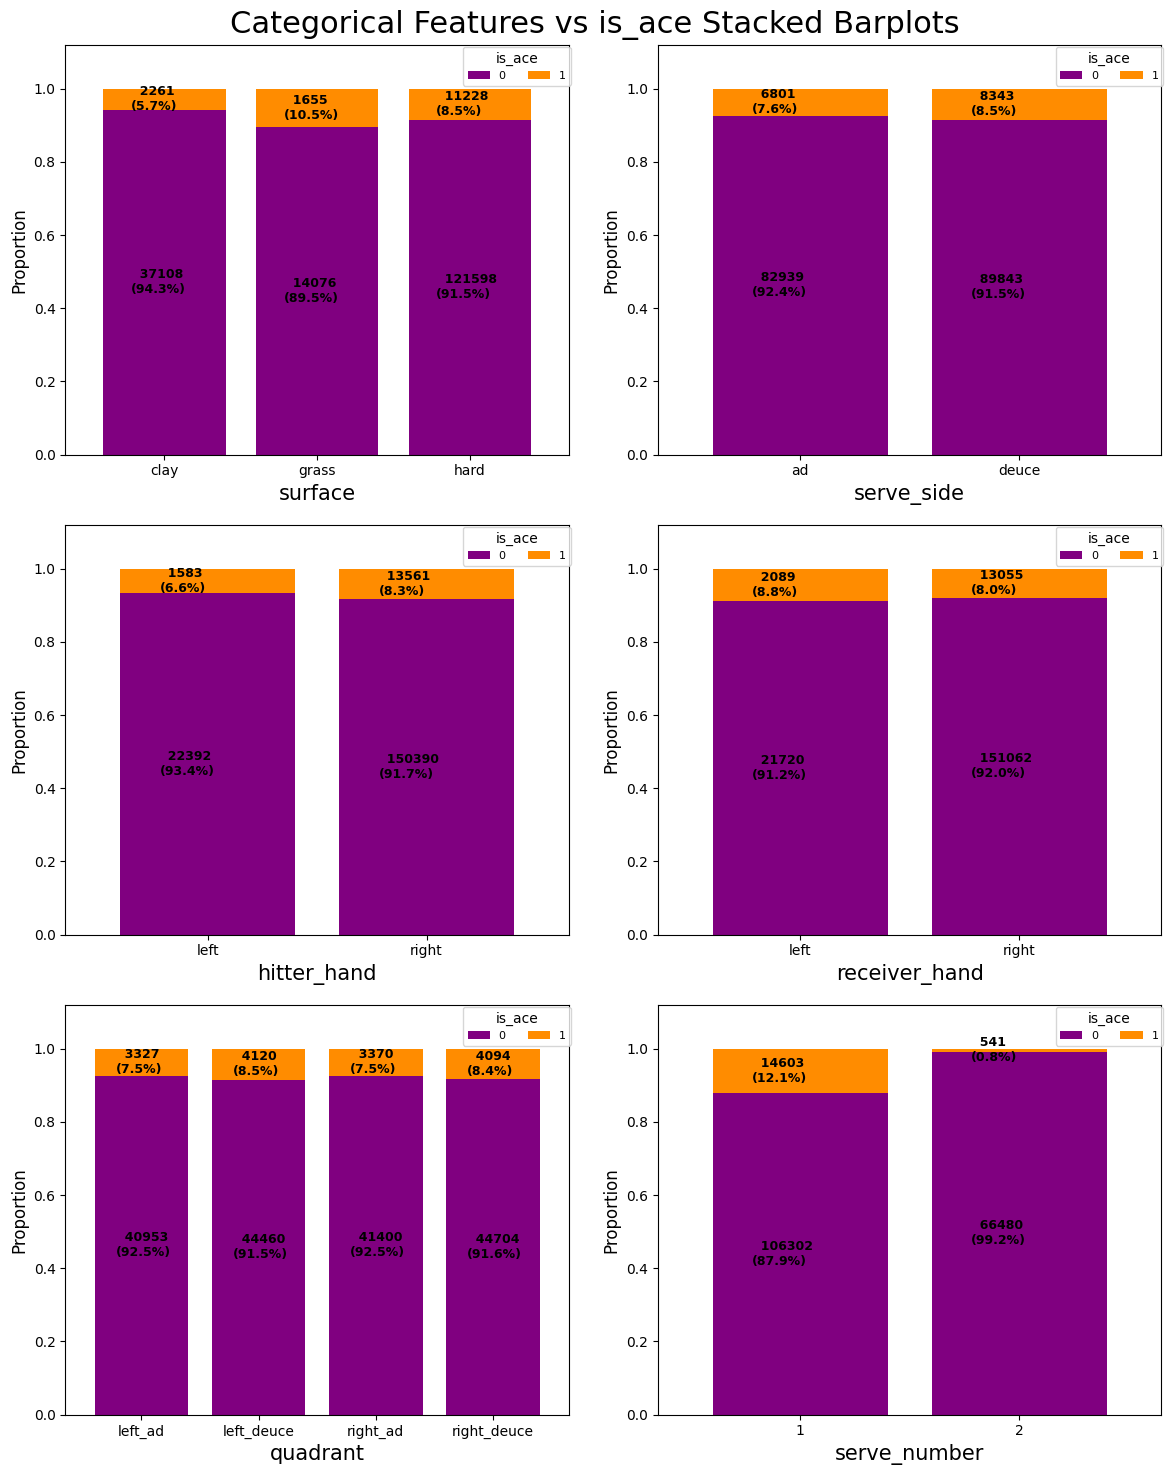

In [17]:

# Calculate grid dimensions
n_features = len(cat_features)
ncols = 2
nrows = (n_features + 1) // ncols

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * nrows))

# Flatten axes for easier access
ax = ax.flatten()

for i, col in enumerate(cat_features):
    # Create a cross-tabulation showing proportions
    cross_tab = pd.crosstab(index=df[col], columns=df[target])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[target], normalize='index')

    cmp = ListedColormap(['purple', 'darkorange'])

    # Plot stacked bar charts
    cross_tab_prop.plot(
        kind='bar',
        ax=ax[i],
        stacked=True,
        width=0.8,
        colormap=cmp,
        legend=False,
        ylabel='Proportion',
    )

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate(cross_tab.index.values):
        for (proportion, count, y_location) in zip(
            cross_tab_prop.loc[val],
            cross_tab.loc[val],
            cross_tab_prop.loc[val].cumsum()
        ):
            ax[i].text(
                x=idx - 0.22,
                y=(y_location - proportion) + (proportion / 2) - 0.03,
                s=f'  {count}\n({np.round(proportion * 100, 1)}%)',
                color="black",
                fontsize=9,
                fontweight="bold",
            )

    ax[i].legend(title='is_ace', loc=(0.79, 0.9), fontsize=8, ncol=2)
    ax[i].set_ylim([0, 1.12])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0)
    ax[i].set_ylabel('Proportion', fontsize=12)
    ax[i].set_xlabel(col, fontsize=15)

# Remove unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.suptitle('Categorical Features vs is_ace Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

<font color='blue'>Notes:</font>

<font color='darkblue'>

*   Bivariate analysis is performed on all the categorical like features in comparision to the targeted variable(*is_ace*)
*   '***surface***'/'***hitter_hand / receiver_hand***' have a ***slight effect*** on the target variable because by changing the category in this feature, the percentage of samples belonging to each class of the target has changed slightly.
*    '***serve_number***' has a ***good effect*** on the target variable because by changing the category in this feature, the percentage of samples belonging to each class of the target has changed considerably good.
*   '***quadrant/serve_side***' has a ***negligible effect*** on the target variable because by changing the category in this feature, the percentage of samples belonging to each class of the target has changed little.
*   Going a head, let us drop '***quadrant/serve_side***' features as this seems to not having a good impact on the model.
</font>

## Step 6.2 | Numerical analysis

In [18]:
# Numerical features
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features.remove('serve_number')
num_features.remove('is_ace')
target = 'is_ace'

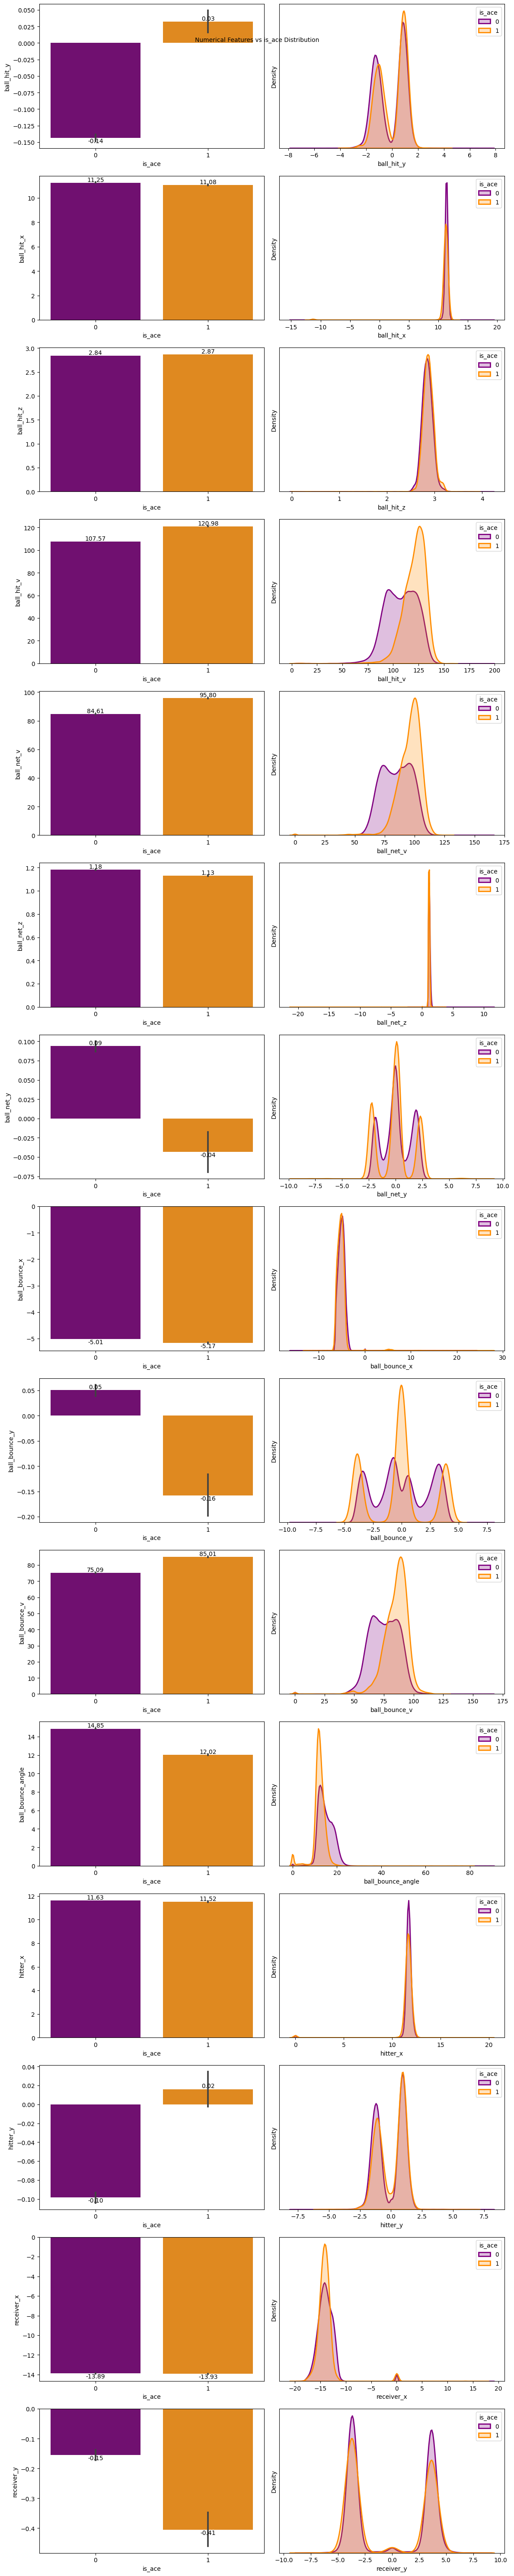

In [19]:
sns.set_palette(['purple', 'darkorange'])

# Determine total subplots required
n_features = len(num_features)
total_subplots = n_features * 2  # Each feature requires 2 subplots

# Determine rows and columns for subplots
cols = 2  # Fixed 2 columns (barplot and KDE for each feature)
rows = (total_subplots + cols - 1) // cols  # Ceiling division for the number of rows

# Create subplots
fig, ax = plt.subplots(rows, cols, figsize=(12, 4 * rows))
ax = ax.flatten()  # Flatten for easy 1D indexing

for i, col in enumerate(num_features):
    # Barplot
    graph = sns.barplot(data=df, x=target, y=col, ax=ax[i * 2])

    # KDE Plot
    sns.kdeplot(data=df[df[target] == 0], x=col, fill=True, linewidth=2, ax=ax[i * 2 + 1], label='0')
    sns.kdeplot(data=df[df[target] == 1], x=col, fill=True, linewidth=2, ax=ax[i * 2 + 1], label='1')
    ax[i * 2 + 1].set_yticks([])
    ax[i * 2 + 1].legend(title='is_ace', loc='upper right')

    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.2f')

# Remove unused subplots
for j in range(n_features * 2, len(ax)):
    fig.delaxes(ax[j])

plt.suptitle('Numerical Features vs is_ace Distribution', fontsize=10)
plt.tight_layout()
plt.show()


<font color='blue'>Notes:</font>

<font color='darkblue'>

*   Bivariate analysis is performed on all the numerical like features in comparision to the targeted variable(*is_ace*)
*   The bar plot that reflects the mean of the feature with reference to the targeted variable(is_ace) is plotted. Also the KDE plot of the feature and the target variable is plotted.
* Among all of the numerical features seen in the above diagram, the ***ball_bounce_v, ball_bounce_angle, ball_bounce_y, ball_net_z, ball_net_y, receiver_x, receiver_y, ball_hit_y*** features have a good impact on the target because the distribution and the average values of data belonging to each class of the target in these features have changed significantly!
* The features, ***ball_hit_x, ball_hit_z, ball_bounce_x, hitter_x*** have no/less impact and hence can be dropped
*   The ***ball_hit_v, ball_net_v*** are kind of colinear features as of ***ball_bounce_v***. Also ***hitter_y*** is collinear to ***ball_hit_y***. Hence ***ball_hit_v, ball_net_v, hitter_y*** can be dropped manually though XGBoost can handle multi colinearity.
</font>

# Step 7 | Handling Null values

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Notes:</font></h3>

* By domain knowledge, we know that for the balls that are landing in there will be some of the non-zero features.
* Those features are **'ball_net_z', 'ball_bounce_v', 'ball_bounce_angle'**
* If there are zero values in the feautes we will treat them as NaN and handle accordingly
* These(['serve_side', 'ball_hit_x', 'ball_hit_z','ball_hit_v', 'ball_net_v', 'ball_bounce_x', 'hitter_x', 'hitter_y', 'receiver_hand', 'quadrant']) are the columns to drop and will be done after NA values are handled.

In [20]:
features_with_non_expected_zero_values = ['ball_net_z', 'ball_bounce_v', 'ball_bounce_angle']
for col in features_with_non_expected_zero_values:
  df[col] = df[col].replace(0, np.nan)

In [21]:
#Create a new column 'null_count' to see if there are data points with many null values
df['null_count'] = df.isnull().sum(axis=1)
df['null_count'].value_counts().sort_index()

0     185496
1       1840
2        268
3        205
4          7
5          1
14        11
16        98
Name: null_count, dtype: int64

In [22]:
# The data points that have most nulls can be deleted
#Drop records with most null values which contains the ball_bounce_x, etc
df = df[df['null_count'] <= 7].copy()
df.drop('null_count', axis=1, inplace=True)
df.shape

(187817, 22)

In [23]:
# Check for missing values
print(df.isnull().sum())

surface                 0
serve_side              0
serve_number            0
ball_hit_y              0
ball_hit_x              0
ball_hit_z              0
ball_hit_v             10
ball_net_v             20
ball_net_z            220
ball_net_y              7
ball_bounce_x           0
ball_bounce_y           0
ball_bounce_v         361
ball_bounce_angle     781
hitter_x                7
hitter_y                7
receiver_x            111
receiver_y            111
hitter_hand             0
receiver_hand           0
is_ace                  0
quadrant             1389
dtype: int64


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Notes:</font></h3>

* The features _ball_hit_v, ball_net_v, ball_net_z, ball_net_y, ball_bounce_x, ball_bounce_v, ball_bounce_angle, hitter_x, hitter_y, receiver_x, receiver_y_ have null values
* Some of the above feautre are related to ball dynamics and some other related to player coordinates
* __Null features with ball dynamics:__ _'ball_hit_v', 'ball_net_v', 'ball_net_z', 'ball_net_y', 'ball_bounce_x', 'ball_bounce_v', 'ball_bounce_angle'._
  These features can be imputed based on _server_side(deuce and ad)_ as ball dynamics differ depending on the serve placement and take the median of the of the subset(deuce/ad)
* __Null features with player coordinates:__ _'hitter_x', 'hitter_y', 'receiver_x', 'receiver_y'._ These features can be imputed  based on _ball_hit_x and ball_hit_y_ as there is a strong relation between hitter/reciever coordinates and the ball_hit_x and ball_hit_y

In [24]:
# Fill ball-related dynamics
for col in ['ball_hit_v', 'ball_net_v', 'ball_net_z', 'ball_net_y', 'ball_bounce_x', 'ball_bounce_v', 'ball_bounce_angle']:
    df.loc[df['serve_side'] == "deuce", col] = df.loc[df['serve_side'] == "deuce", col].fillna(
        df.loc[df['serve_side'] == "deuce", col].median()
    )
    df.loc[df['serve_side'] == "ad", col] = df.loc[df['serve_side'] == "ad", col].fillna(
        df.loc[df['serve_side'] == "ad", col].median()
    )

# Fill hitter, receiver_x coordinates
for col in ['hitter_x', 'hitter_y', 'receiver_x', 'receiver_y']:
    df.loc[df['ball_hit_x'] > 0, col] = df.loc[df['ball_hit_x'] > 0, col].fillna(
        df.loc[df['ball_hit_x'] > 0, col].median()
    )
    df.loc[df['ball_hit_x'] <= 0, col] = df.loc[df['ball_hit_x'] <= 0, col].fillna(
        df.loc[df['ball_hit_x'] <= 0, col].median()
    )

In [25]:
#Let us make sure that there is no other missing data.

print('Number of missing values in df: {}'.format(df[[col for col in df.columns if col != 'quadrant']].isnull().sum().sum()))

Number of missing values in df: 0


# Step 8 | Drop unwanted columns

In [26]:
columns_to_drop = ['serve_side', 'ball_hit_x', 'ball_hit_z', 'ball_hit_v', 'ball_net_v', 'ball_bounce_x', 'hitter_x', 'hitter_y',  'quadrant']

In [27]:
df.drop(columns_to_drop, axis=1, inplace=True)

# Step 9 | Categorical Feautre Encoding

In [28]:
df = pd.get_dummies(df, columns=["surface", "hitter_hand", "receiver_hand"],  dtype=int, drop_first=True)

# Step 10 | Correlation Analysis

/Users/xuo772/Library/Caches/pypoetry/virtualenvs/non-package-mode-xlRIhAlD-py3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


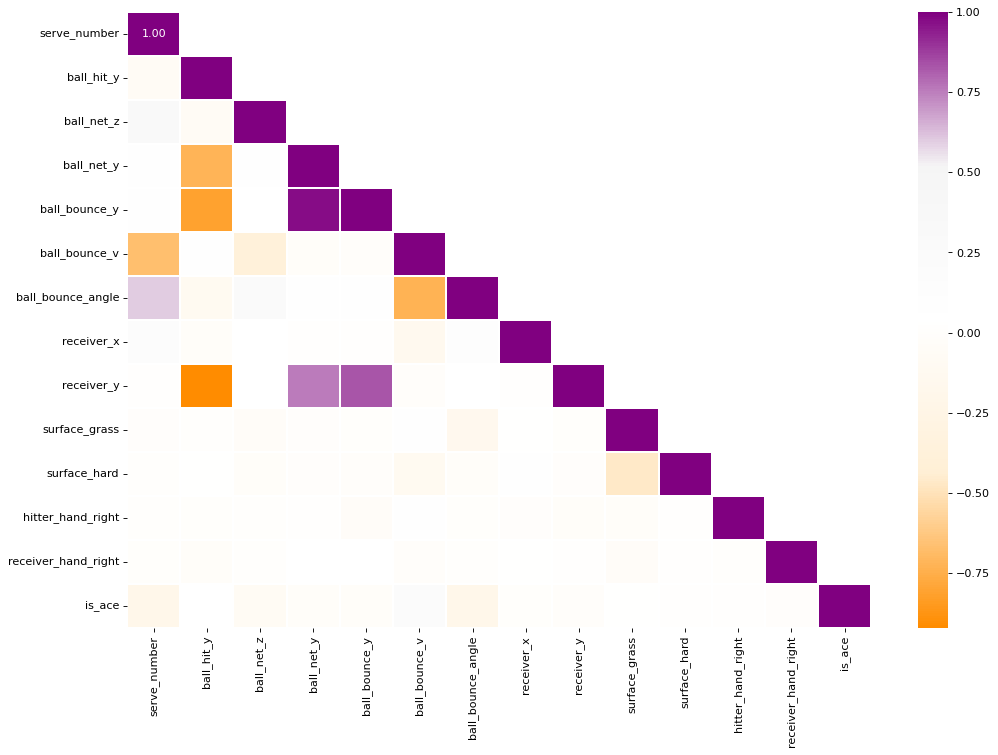

In [29]:
# Define a customized colormap

## Define the number of colors in the colormap
num_colors = 256
## Create a list of colors with the two defined colors as the endpoints
colors = ['darkorange', '#FFEFD5', 'white', '#F5F5F5',  'purple']
## Create a custom colormap with the defined colors
my_cmap = LinearSegmentedColormap.from_list('my_colormap', colors, num_colors)

# Calculation of the Spearman correlation
target = 'is_ace'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=my_cmap, fmt='.2f', linewidths=0.2)
plt.show()

# Step 11 | Train-Test Split

In [30]:
X = df.drop('is_ace', axis=1)
y = df['is_ace']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The dataset is an imabalance dataset.
Let us see what percent of 'is_ace' in the dataset

In [31]:
print(f"there is {round(sum(y)/len(y)*100, 2)} % of aces in the whole dataset")
print(f"After stratify, there is {round(sum(y_train)/len(y_train)*100, 2)} % of aces in the train dataset")
print(f"After stratify, there is {round(sum(y_test)/len(y_test)*100, 2)} % of aces in the test dataset")

there is 8.05 % of aces in the whole dataset
After stratify, there is 8.05 % of aces in the train dataset
After stratify, there is 8.05 % of aces in the test dataset


# Step 12 | XG Boost Model Building and parameter tuning

In [32]:
#Round1
param_grid = {
    'gamma':[0, 0.25, 0.5 ],
    'learning_rate': [0.01, 0.1, 0.2, 0.8],
    'max_depth':[6, 7, 8],
    'reg_lambda': [0.5, 1.0],
    'scale_pos_weight': [0.8, 1.0]
}
# {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 1.0, 'scale_pos_weight': 1.0}



In [33]:
#Round2
param_grid = {
    'gamma':[0.25],
    'learning_rate': [0.1],
    'max_depth':[7],
    'reg_lambda': [1.0, 10.0, 15.0],
    'scale_pos_weight': [1, 3, 5]
}
# best_params : {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


In [34]:
optimal_params = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic',
                            random_state = 42,
                            subsample = 0.9,
                            colsample_bytree=0.5,
                            early_stopping_rounds = 10,
                            eval_metric='aucpr'#auc
                            ),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=5
)

In [35]:
# optimal_params.fit(X_train,
#                    y_train,
#                    eval_set=[(X_test, y_test)],
#                    verbose=False)
# print(optimal_params.best_params_)

# Step 13 | XG Boost Model Run and Evaluation

In [36]:
clf_xgb = XGBClassifier(objective='binary:logistic',
                        eval_metric='aucpr',
                        seed = 42,
                        random_state = 42,
                        early_stopping_rounds = 10,
                        subsample = 0.9,
                        colsample_bytree=0.5,
                        gamma = 0.25,
                        learning_rate = 0.1,
                        max_depth = 7,
                        reg_lambda = 10.0,
                        scale_pos_weight = 3)
clf_xgb.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.19705
[1]	validation_0-aucpr:0.20703
[2]	validation_0-aucpr:0.35979
[3]	validation_0-aucpr:0.34385
[4]	validation_0-aucpr:0.32764
[5]	validation_0-aucpr:0.32169
[6]	validation_0-aucpr:0.52094
[7]	validation_0-aucpr:0.54467
[8]	validation_0-aucpr:0.53161
[9]	validation_0-aucpr:0.57103
[10]	validation_0-aucpr:0.58576
[11]	validation_0-aucpr:0.59150
[12]	validation_0-aucpr:0.59236
[13]	validation_0-aucpr:0.59729
[14]	validation_0-aucpr:0.59815
[15]	validation_0-aucpr:0.60257
[16]	validation_0-aucpr:0.60320
[17]	validation_0-aucpr:0.60519
[18]	validation_0-aucpr:0.60791
[19]	validation_0-aucpr:0.60844
[20]	validation_0-aucpr:0.61021
[21]	validation_0-aucpr:0.61213
[22]	validation_0-aucpr:0.61284
[23]	validation_0-aucpr:0.61350
[24]	validation_0-aucpr:0.61372
[25]	validation_0-aucpr:0.61439
[26]	validation_0-aucpr:0.61709
[27]	validation_0-aucpr:0.61921
[28]	validation_0-aucpr:0.61953
[29]	validation_0-aucpr:0.61988
[30]	validation_0-aucpr:0.62036
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [37]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [38]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # purple_cmap = colors.LinearSegmentedColormap.from_list("Green", ["Green", "red"])

    # Set font scale
    sns.set(font_scale=1.5)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap="cividis", ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('lightblue')

    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97    138160
           1       0.59      0.77      0.67     12093

    accuracy                           0.94    150253
   macro avg       0.78      0.86      0.82    150253
weighted avg       0.95      0.94      0.94    150253


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     34541
           1       0.55      0.70      0.61      3023

    accuracy                           0.93     37564
   macro avg       0.76      0.82      0.79     37564
weighted avg       0.94      0.93      0.93     37564





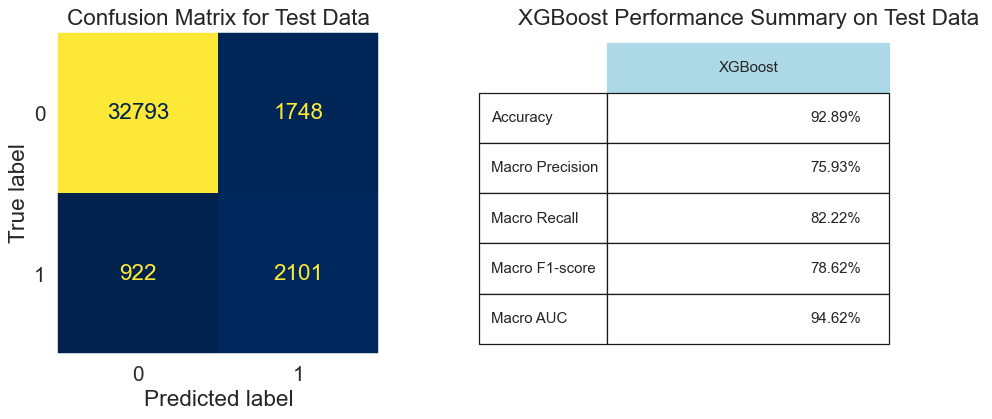

In [39]:
model_evaluation(clf_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

# Step 14 | Predict sample data points

In [40]:
test_sample = X_test.iloc[0:10].copy()
predictions = clf_xgb.predict(test_sample)
test_sample['is_ace'] = predictions
test_sample

,serve_number,ball_hit_y,ball_net_z,ball_net_y,ball_bounce_y,ball_bounce_v,ball_bounce_angle,receiver_x,receiver_y,surface_grass,surface_hard,hitter_hand_right,receiver_hand_right,is_ace
14215,1,-1.006,1.148,0.631,1.405,85.8,11.922,-13.273,3.472,0,1,1,1,0
79685,1,0.892,1.227,-1.927,-3.640,78.6,12.670,-13.615,-3.647,1,0,1,1,0
73731,2,1.232,1.317,-0.229,-1.290,68.2,16.105,-12.868,-3.507,0,1,1,1,0
71434,1,0.766,1.081,0.142,-0.178,95.3,11.820,-14.780,-3.272,0,1,1,1,1
93551,2,0.374,1.333,0.141,-0.307,65.2,16.869,-16.336,-3.868,0,0,1,1,0
125666,1,-1.088,1.089,2.443,3.781,86.0,15.231,-13.985,3.591,0,1,1,1,0
108888,2,-1.469,1.245,0.796,1.217,60.7,22.156,-15.518,3.075,0,0,1,0,0
169033,1,-1.246,1.099,-0.080,0.384,83.6,12.035,-13.909,3.561,0,1,1,1,0
6154,2,-0.295,1.225,2.609,3.662,82.9,14.594,-13.446,3.144,0,1,1,1,0
99863,2,-1.153,1.072,1.811,2.637,68.7,17.055,-16.469,3.551,0,1,1,1,0
